Нормировка: 0.484848
Условие нормировки выполнено: False


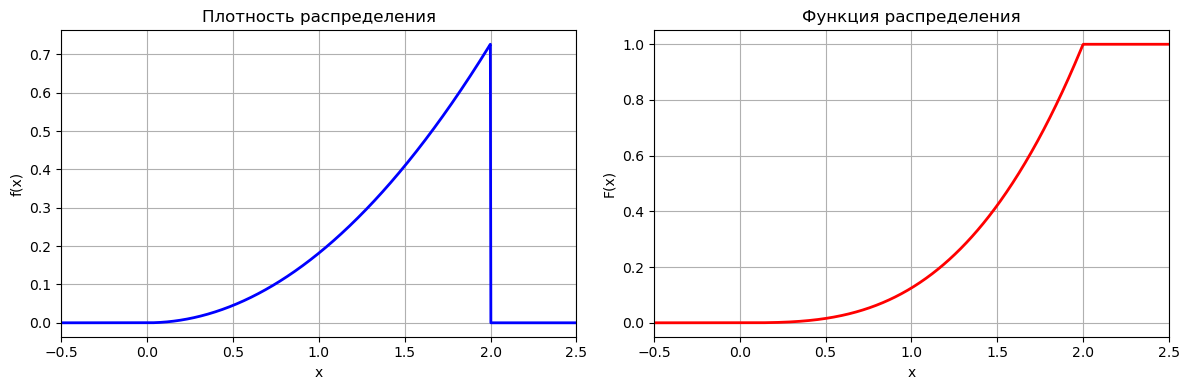

P(0.5 < X < 1.5) = 0.196970
Математическое ожидание: 0.727273
Дисперсия: 0.634711
Среднее квадратическое отклонение: 0.796687
Квантиль уровня q = 0.75: 1.817121
90%-ная точка: 1.930979
Коэффициент асимметрии: 0.727876
Эксцесс: -2.026312


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

def pdf(x):
    if 0 <= x <= 2:
        return (2/11) * x**2
    else:
        return 0.0

norm_check, _ = integrate.quad(pdf, -np.inf, np.inf)
print(f"Нормировка: {norm_check:.6f}")
print(f"Условие нормировки выполнено: {abs(norm_check - 1.0) < 1e-10}")

x_vals = np.linspace(-0.5, 2.5, 1000)
pdf_vals = np.array([pdf(x) for x in x_vals])

cdf_vals = np.zeros_like(x_vals)
for i, x in enumerate(x_vals):
    if x <= 0:
        cdf_vals[i] = 0.0
    elif x <= 2:
        cdf_vals[i] = (1/8) * x**3
    else:
        cdf_vals[i] = 1.0

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(x_vals, pdf_vals, 'b-', linewidth=2)
ax1.set_title('Плотность распределения')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.set_xlim(-0.5, 2.5)

ax2.plot(x_vals, cdf_vals, 'r-', linewidth=2)
ax2.set_title('Функция распределения')
ax2.set_xlabel('x')
ax2.set_ylabel('F(x)')
ax2.grid(True)
ax2.set_xlim(-0.5, 2.5)
ax2.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

interval_prob, _ = integrate.quad(pdf, 0.5, 1.5)
print(f"P(0.5 < X < 1.5) = {interval_prob:.6f}")

mean, _ = integrate.quad(lambda x: x * pdf(x), 0, 2)
print(f"Математическое ожидание: {mean:.6f}")

sec_moment, _ = integrate.quad(lambda x: x**2 * pdf(x), 0, 2)
variance = sec_moment - mean**2
print(f"Дисперсия: {variance:.6f}")

std_dev = np.sqrt(variance)
print(f"Среднее квадратическое отклонение: {std_dev:.6f}")

q = 0.75
quantile = (8 * q)**(1/3)
print(f"Квантиль уровня q = {q}: {quantile:.6f}")

p = 90
percent_point = (8 * p / 100)**(1/3)
print(f"{p}%-ная точка: {percent_point:.6f}")

third_central, _ = integrate.quad(lambda x: (x - mean)**3 * pdf(x), 0, 2)
skewness = third_central / (std_dev**3)
print(f"Коэффициент асимметрии: {skewness:.6f}")

fourth_central, _ = integrate.quad(lambda x: (x - mean)**4 * pdf(x), 0, 2)
excess = fourth_central / (std_dev**4) - 3
print(f"Эксцесс: {excess:.6f}")